In [ ]:
# airbnb prices will drop
# price of sales will drop
# zipcodes along the L train which also have alternate access to manhattan trains will not experience a significance drop in sales

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gmplot
from scipy.stats import ttest_ind
source1 = 'AirbnbSept19.csv'
source2 = 'Rolling Sales NYC/rollingsales_brooklyn_2019.csv'

abb_sept_2018 = 'AirBnB Listings/with zipcodes/df_abb_sept_2018.csv'
abb_oct_2018 = 'AirBnB Listings/with zipcodes/df_abb_oct_2018.csv'
abb_nov_2018 = 'AirBnB Listings/with zipcodes/df_abb_nov_2018.csv'
abb_dec_2018 = 'AirBnB Listings/with zipcodes/df_abb_dec_2018.csv'
abb_jan_2019 = 'AirBnB Listings/with zipcodes/df_abb_jan_2019.csv'
abb_feb_2019 = 'AirBnB Listings/with zipcodes/df_abb_feb_2019.csv'
abb_mar_2019 = 'AirBnB Listings/with zipcodes/df_abb_mar_2019.csv'

df_abb_sept_2018 = pd.read_csv(abb_sept_2018)
df_abb_oct_2018 = pd.read_csv(abb_oct_2018)
df_abb_nov_2018 = pd.read_csv(abb_nov_2018)
df_abb_dec_2018 = pd.read_csv(abb_dec_2018)
df_abb_jan_2019 = pd.read_csv(abb_jan_2019)
df_abb_feb_2019 = pd.read_csv(abb_feb_2019)
df_abb_mar_2019 = pd.read_csv(abb_mar_2019)

In [4]:
# L Train Data Set

In [5]:
# subset dataframe only to L train zipcode neighborhoods: 
L_train_zip = [11211, 11206, 11206, 11207, 11221, 11237, 11236, 11234, 11239]
df_abb_sept_2018_sub = df_abb_sept_2018[df_abb_sept_2018['zipcode'].isin(L_train_zip)]
df_abb_oct_2018_sub  = df_abb_oct_2018[df_abb_oct_2018['zipcode'].isin(L_train_zip)]
df_abb_nov_2018_sub  = df_abb_nov_2018[df_abb_nov_2018['zipcode'].isin(L_train_zip)]
df_abb_dec_2018_sub  = df_abb_dec_2018[df_abb_dec_2018['zipcode'].isin(L_train_zip)]
df_abb_jan_2019_sub  = df_abb_jan_2019[df_abb_jan_2019['zipcode'].isin(L_train_zip)]
df_abb_feb_2019_sub  = df_abb_feb_2019[df_abb_feb_2019['zipcode'].isin(L_train_zip)]
df_abb_mar_2019_sub  = df_abb_mar_2019[df_abb_mar_2019['zipcode'].isin(L_train_zip)]

does shut down affect the distribution of airbnb availability for rentals. The median is more robust to outliers. So, we are using the median instead of the mean.

In [6]:
print('For sept 2018, the median is', df_abb_sept_2018_sub['availability_365'].median(), 'the standard deviation is', df_abb_sept_2018_sub['availability_365'].std())
print('For Dec 2019, the median is', df_abb_dec_2018_sub['availability_365'].median(), 'the standard deviation is', df_abb_dec_2018_sub['availability_365'].std())
print('For Mar 2019, the median is', df_abb_mar_2019_sub['availability_365'].median(), 'the standard deviation is', df_abb_mar_2019_sub['availability_365'].std())


For sept 2018, the median is 19.0 the standard deviation is 125.59390583452557
For Dec 2019, the median is 37.0 the standard deviation is 131.24231417926208
For Mar 2019, the median is 26.0 the standard deviation is 126.74027183407284


We want to know if the shut down affect the distribution airbnb availability for rentals. The median is more robust to outliers. So, we are using the median instead of the mean.

In [7]:
print('For sept 2018, the median is', df_abb_sept_2018_sub['availability_365'].median(), 'the standard deviation is', df_abb_sept_2018_sub['availability_365'].std())
print('For Dec 2019, the median is', df_abb_dec_2018_sub['availability_365'].median(), 'the standard deviation is', df_abb_dec_2018_sub['availability_365'].std())
print('For Mar 2019, the median is', df_abb_mar_2019_sub['availability_365'].median(), 'the standard deviation is', df_abb_mar_2019_sub['availability_365'].std())


For sept 2018, the median is 19.0 the standard deviation is 125.59390583452557
For Dec 2019, the median is 37.0 the standard deviation is 131.24231417926208
For Mar 2019, the median is 26.0 the standard deviation is 126.74027183407284


As shown above, shut down may affect rental. In particular, in December 2018, median rental availability went up to 37. We should expect less available rentals in Christmas month. The market is also more volatile. The standard deviation is 131.24. Hihger than both September and March.

We can't yet claim less people using Airbnb is due to L-train shutdown. We need to look at how other neighbhood did, was there also a reduction in rental? We will look at that below.

In [8]:
df_abb_mar_2019_sub

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,zipcode
2,3330,++ Brooklyn Penthouse Guestroom ++,4177,Jbee,Brooklyn,Williamsburg,40.70856,-73.94236,Private room,70,5,39,2018-12-07,0.35,3,217,11211
18,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70837,-73.95352,Entire home/apt,140,2,127,2019-02-27,1.07,1,183,11211
24,7801,Sweet and Spacious Brooklyn Loft,21207,Chaya,Brooklyn,Williamsburg,40.71842,-73.95718,Entire home/apt,299,3,9,2011-12-28,0.08,1,0,11211
39,11452,Clean and Quiet in Brooklyn,7355,Vt,Brooklyn,Bedford-Stuyvesant,40.68876,-73.94312,Private room,35,60,0,NaN,NaN,1,306,11221
40,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70186,-73.92745,Entire home/apt,85,2,207,2019-02-03,1.82,2,33,11237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49703,32834423,"Comfy room in large, dog-friendly apt w/ balcony",4094038,Alex,Brooklyn,Williamsburg,40.71036,-73.94053,Private room,65,2,0,NaN,NaN,2,56,11211
49726,32843179,"Sunny, Stylish, Bedstuy 2 Bedroom with Plants",21001651,Tierney,Brooklyn,Bedford-Stuyvesant,40.69346,-73.94907,Entire home/apt,125,2,0,NaN,NaN,2,20,11206
49727,32843535,Sunny stylish room in bedstuy brownstone w/ desk,21001651,Tierney,Brooklyn,Bedford-Stuyvesant,40.69244,-73.95064,Private room,75,2,0,NaN,NaN,2,51,11206
49737,32845716,3 Bedroom Artist Loft in Williamsburg Prime,1019963,Renzo,Brooklyn,Williamsburg,40.71733,-73.96049,Entire home/apt,349,2,0,NaN,NaN,1,122,11211


In [9]:
# print(df_abb_sept_2018_sub['availability_365'].median())
# print(df_abb_oct_2018_sub['availability_365'].median())
# print(df_abb_nov_2018_sub['availability_365'].median())
# print(df_abb_dec_2018_sub['availability_365'].median())
# print(df_abb_jan_2019_sub['availability_365'].median())
# print(df_abb_feb_2019_sub['availability_365'].median())
# print(df_abb_mar_2019_sub['availability_365'].median())

median_of_availability = np.array([df_abb_sept_2018_sub['availability_365'].median(), df_abb_oct_2018_sub['availability_365'].median(), 
                          df_abb_nov_2018_sub['availability_365'].median(), df_abb_dec_2018_sub['availability_365'].median(), 
                          df_abb_jan_2019_sub['availability_365'].median(), df_abb_feb_2019_sub['availability_365'].median(), 
                          df_abb_mar_2019_sub['availability_365'].median()])
median_of_availability = pd.Series(median_of_availability, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
print('The median of availatility for each month is:\n')
print(median_of_availability)

The median of availatility for each month is:

Sept    19.0
Oct     19.0
Nov     27.0
Dec     37.0
Jan     37.0
Feb     32.0
Mar     26.0
dtype: float64


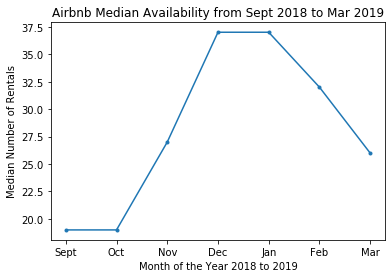

In [10]:
# plot rental availability of L-train neighborhood
plt.plot(median_of_availability, '.-')
plt.title('Airbnb Median Availability from Sept 2018 to Mar 2019')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Median Number of Rentals')
plt.show()

L-train shut down did affect Airbnb rental. From the plot, we see that there is spike on available rentals in Nov, Dec, and Jan. And then, less availability when L-train partially resumed after Jan 3.

In [11]:
# percentage of availabile rentals for Sept, Nov, Jan, Mar
print(df_abb_sept_2018_sub['availability_365'].sum()/df_abb_sept_2018_sub['availability_365'].shape[0]/365)
print(df_abb_nov_2018_sub['availability_365'].sum()/df_abb_nov_2018_sub['availability_365'].shape[0]/365)
print(df_abb_jan_2019_sub['availability_365'].sum()/df_abb_jan_2019_sub['availability_365'].shape[0]/365)
print(df_abb_mar_2019_sub['availability_365'].sum()/df_abb_mar_2019_sub['availability_365'].shape[0]/365)

0.26319526470378724
0.2752516867716213
0.28499585186927184
0.2686946548287132


Compare September 2018 to January 2019, there is a reduction of 0.285-0.263 = 2.2% in rental.

## Let's look at not L-train neighborhood

In [12]:
# not L-train neighborhood
# Booking Trend
df_abb_sept_2018['availability_365'].value_counts().mean()
df_abb_sept_2018_sub_not_L_train_nbhd = df_abb_sept_2018[~df_abb_sept_2018['zipcode'].isin(L_train_zip)]
df_abb_oct_2018_sub_not_L_train_nbhd  = df_abb_oct_2018[~df_abb_oct_2018['zipcode'].isin(L_train_zip)]
df_abb_nov_2018_sub_not_L_train_nbhd  = df_abb_nov_2018[~df_abb_nov_2018['zipcode'].isin(L_train_zip)]
df_abb_dec_2018_sub_not_L_train_nbhd  = df_abb_dec_2018[~df_abb_dec_2018['zipcode'].isin(L_train_zip)]
df_abb_jan_2019_sub_not_L_train_nbhd  = df_abb_jan_2019[~df_abb_jan_2019['zipcode'].isin(L_train_zip)]
df_abb_feb_2019_sub_not_L_train_nbhd  = df_abb_feb_2019[~df_abb_feb_2019['zipcode'].isin(L_train_zip)]
df_abb_mar_2019_sub_not_L_train_nbhd  = df_abb_mar_2019[~df_abb_mar_2019['zipcode'].isin(L_train_zip)]

In [13]:
print('For sept 2018, the median is', df_abb_sept_2018_sub_not_L_train_nbhd['availability_365'].median(), 'the standard deviation is', df_abb_sept_2018_sub_not_L_train_nbhd['availability_365'].std())
print('For Dec 2019, the median is', df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].median(), 'the standard deviation is', df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].std())
print('For Mar 2019, the median is', df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].median(), 'the standard deviation is', df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].std())


For sept 2018, the median is 55.0 the standard deviation is 134.66753994674025
For Dec 2019, the median is 70.0 the standard deviation is 139.20067385394447
For Mar 2019, the median is 65.0 the standard deviation is 135.4892941079491


In [14]:
# print(df_abb_sept_2018_sub_not_L_train_nbhd ['availability_365'].median())
# print(df_abb_oct_2018_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_nov_2018_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_jan_2019_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_feb_2019_sub_not_L_train_nbhd['availability_365'].median())
# print(df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].median())

print('The median of availatility for each month is:\n')
median_of_availability_not_L_train_nbhd = np.array([df_abb_sept_2018_sub_not_L_train_nbhd['availability_365'].median(), df_abb_oct_2018_sub_not_L_train_nbhd['availability_365'].median(), 
                          df_abb_nov_2018_sub_not_L_train_nbhd['availability_365'].median(), df_abb_dec_2018_sub_not_L_train_nbhd['availability_365'].median(), 
                          df_abb_jan_2019_sub_not_L_train_nbhd['availability_365'].median(), df_abb_feb_2019_sub_not_L_train_nbhd['availability_365'].median(), 
                          df_abb_mar_2019_sub_not_L_train_nbhd['availability_365'].median()])
median_of_availability_not_L_train_nbhd = pd.Series(median_of_availability_not_L_train_nbhd, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
print(median_of_availability_not_L_train_nbhd)

The median of availatility for each month is:

Sept    55.0
Oct     58.0
Nov     61.0
Dec     70.0
Jan     78.0
Feb     75.0
Mar     65.0
dtype: float64


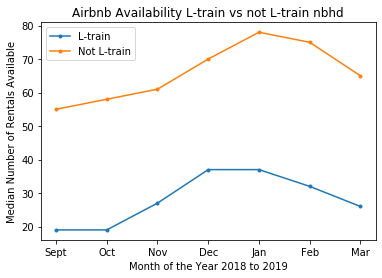

In [15]:
# plot median rental availability of L-train vs not L-train neighborhood
plt.plot(median_of_availability, '.-', label='L-train')
plt.plot(median_of_availability_not_L_train_nbhd, '.-', label='Not L-train')
plt.title('Airbnb Availability L-train vs not L-train nbhd')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Median Number of Rentals Available')
plt.legend()
plt.show()

In [16]:
# plotting
# 1. a) scatterplot b) bar graph c) boxplot
# 2. a) map plotted with airbnb NYC sales and rental b) distance from train: overlaying a .3 - .5 mile circle around train stations
# 3. heatmap

In [17]:
latitudes = df_abb_sept_2018_sub["latitude"]
longitudes = df_abb_sept_2018_sub["longitude"]


In [18]:
# Creating the location we would like to initialize the focus on. 
# Parameters: Lattitude, Longitude, Zoom
gmap = gmplot.GoogleMapPlotter(latitudes.mean(), longitudes.mean(), 12)
gmap.heatmap(latitudes, longitudes)
gmap.draw("my_heatmap.html")

We perform three hypothesis tests for September, December, and March, respectively. We want to see if there is a statistical significance between L-train and not L-train neighbhorhoods.

In [19]:
# testing hypthesis
# t-test
print(ttest_ind(df_abb_sept_2018_sub['availability_365'], df_abb_sept_2018_sub_not_L_train_nbhd['availability_365']))
print(ttest_ind(df_abb_dec_2018_sub['availability_365'], df_abb_dec_2018_sub_not_L_train_nbhd['availability_365']))
print(ttest_ind(df_abb_mar_2019_sub['availability_365'], df_abb_mar_2019_sub_not_L_train_nbhd['availability_365']))


Ttest_indResult(statistic=-14.224628704879674, pvalue=7.913050776111513e-46)
Ttest_indResult(statistic=-14.476736677354367, pvalue=2.129385279399251e-47)
Ttest_indResult(statistic=-15.002993704087904, pvalue=9.066640349370396e-51)


We see that the p-value for all three months have p-value close to zero. We say that there is a difference in neighborhood rental availability.

## Let's look at average of the median price: L-train neighborhood vs. outside L-train neighborhood

### We clean out the zero availability in dataset and separate by zipcode

In [20]:
# L-train neighborhood
# df_abb_sept_2018_sub['price'][df_abb_sept_2018_sub['availability_365']>0]
# df_abb_sept_2018_sub['availability_365']>0 & df_abb_sept_2018_sub['column_name'] <= B

median_of_price = np.array([df_abb_sept_2018_sub['price'][df_abb_sept_2018_sub['availability_365']>0].median(), 
                                   df_abb_oct_2018_sub['price'][df_abb_oct_2018_sub['availability_365']>0].median(),
                                   df_abb_nov_2018_sub['price'][df_abb_nov_2018_sub['availability_365']>0].median(),
                                   df_abb_dec_2018_sub['price'][df_abb_dec_2018_sub['availability_365']>0].median(),
                                   df_abb_jan_2019_sub['price'][df_abb_jan_2019_sub['availability_365']>0].median(),
                                   df_abb_feb_2019_sub['price'][df_abb_feb_2019_sub['availability_365']>0].median(),
                                   df_abb_mar_2019_sub['price'][df_abb_mar_2019_sub['availability_365']>0].median()])
median_of_price = pd.Series(median_of_price, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
print('L-train neighborhood median of prices for each month is:\n')
print(median_of_price)

L-train neighborhood median of prices for each month is:

Sept    89.0
Oct     89.0
Nov     89.0
Dec     89.0
Jan     85.0
Feb     87.0
Mar     85.0
dtype: float64


In [21]:
## Separate by zipcode
## L-train neighborhood
median_of_price_over_zipcode = np.array(df_abb_sept_2018_sub.loc[:, ['zipcode', 'price']].where(df_abb_sept_2018_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_oct_2018_sub.loc[:, ['zipcode', 'price']].where(df_abb_oct_2018_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_nov_2018_sub.loc[:, ['zipcode', 'price']].where(df_abb_nov_2018_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_dec_2018_sub.loc[:, ['zipcode', 'price']].where(df_abb_dec_2018_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_jan_2019_sub.loc[:, ['zipcode', 'price']].where(df_abb_jan_2019_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_feb_2019_sub.loc[:, ['zipcode', 'price']].where(df_abb_feb_2019_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_mar_2019_sub.loc[:, ['zipcode', 'price']].where(df_abb_mar_2019_sub['availability_365']>0).groupby(['zipcode']).median().mean().tolist())

median_of_price_over_zipcode = pd.Series(median_of_price_over_zipcode, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
median_of_price_over_zipcode

Sept    80.7500
Oct     80.7500
Nov     81.4375
Dec     86.4375
Jan     84.8750
Feb     84.5000
Mar     83.6875
dtype: float64

In [22]:
## not L-train neighborhood
median_of_price_over_zipcode_not_L_train_nbhd = np.array(df_abb_sept_2018_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_sept_2018_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_oct_2018_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_oct_2018_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_nov_2018_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_nov_2018_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_dec_2018_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_dec_2018_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_jan_2019_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_jan_2019_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_feb_2019_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_feb_2019_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist() \
+ df_abb_mar_2019_sub_not_L_train_nbhd.loc[:, ['zipcode', 'price']].where(df_abb_mar_2019_sub_not_L_train_nbhd['availability_365']>0).groupby(['zipcode']).median().mean().tolist())

median_of_price_over_zipcode_not_L_train_nbhd = pd.Series(median_of_price_over_zipcode_not_L_train_nbhd, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
median_of_price_over_zipcode_not_L_train_nbhd

Sept    110.443243
Oct     110.389785
Nov     107.837838
Dec     109.438503
Jan     106.363636
Feb     107.181081
Mar     108.070652
dtype: float64

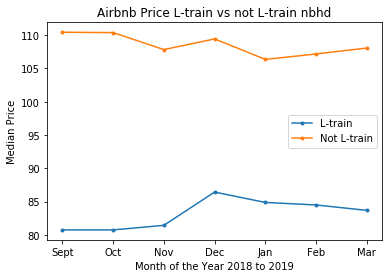

In [23]:
# plot median rental price of L-train vs not L-train neighborhood
plt.plot(median_of_price_over_zipcode, '.-', label='L-train')
plt.plot(median_of_price_over_zipcode_not_L_train_nbhd, '.-', label='Not L-train')
plt.title('Airbnb Price L-train vs not L-train nbhd')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Median Price')
plt.legend()
plt.show()

## Percent change

In [24]:
print('L-train neighbhorhood percent change')
print(median_of_price_over_zipcode.pct_change())
print('Outside L-train neighbhorhood percent change')
print(median_of_price_over_zipcode_not_L_train_nbhd.pct_change())

L-train neighbhorhood percent change
Sept         NaN
Oct     0.000000
Nov     0.008514
Dec     0.061397
Jan    -0.018077
Feb    -0.004418
Mar    -0.009615
dtype: float64
Outside L-train neighbhorhood percent change
Sept         NaN
Oct    -0.000484
Nov    -0.023118
Dec     0.014843
Jan    -0.028097
Feb     0.007685
Mar     0.008300
dtype: float64


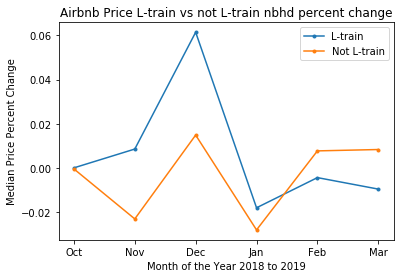

In [25]:
plt.plot(median_of_price_over_zipcode.pct_change(), '.-', label='L-train')
plt.plot(median_of_price_over_zipcode_not_L_train_nbhd.pct_change(), '.-', label='Not L-train')
plt.title('Airbnb Price L-train vs not L-train nbhd percent change')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Median Price Percent Change')
plt.legend()
plt.show()

## Unique ID count: L-train vs. Outside L-train neighborhood

In [26]:
# count of ID by month
# graph of X: month, y: Count ID for L-train vs. non L-train
# save in png
# unique ID count of L-train neighborhood
unique_ID_count = np.array([df_abb_sept_2018_sub['id'].nunique(), df_abb_oct_2018_sub['id'].nunique(), 
df_abb_nov_2018_sub['id'].nunique(),
df_abb_dec_2018_sub['id'].nunique(),
df_abb_jan_2019_sub['id'].nunique(),
df_abb_feb_2019_sub['id'].nunique(),
df_abb_mar_2019_sub['id'].nunique()])
unique_ID_count = pd.Series(unique_ID_count, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
unique_ID_count

Sept    8269
Oct     8221
Nov     8375
Dec     8123
Jan     8388
Feb     8302
Mar     8253
dtype: int32

In [27]:
# unique ID count outside L-train neighborhood
unique_ID_count_not_L_train_nbhd = np.array([df_abb_sept_2018_sub_not_L_train_nbhd['id'].nunique(), df_abb_oct_2018_sub_not_L_train_nbhd['id'].nunique(), 
df_abb_nov_2018_sub_not_L_train_nbhd['id'].nunique(),
df_abb_dec_2018_sub_not_L_train_nbhd['id'].nunique(),
df_abb_jan_2019_sub_not_L_train_nbhd['id'].nunique(),
df_abb_feb_2019_sub_not_L_train_nbhd['id'].nunique(),
df_abb_mar_2019_sub_not_L_train_nbhd['id'].nunique()])

unique_ID_count_not_L_train_nbhd = pd.Series(unique_ID_count_not_L_train_nbhd, index=['Sept', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar'])
unique_ID_count_not_L_train_nbhd

Sept    41951
Oct     41820
Nov     42593
Dec     40933
Jan     42329
Feb     41926
Mar     41495
dtype: int32

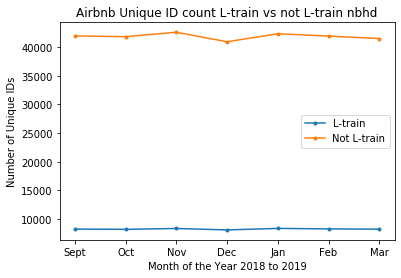

In [28]:
plt.plot(unique_ID_count, '.-', label='L-train')
plt.plot(unique_ID_count_not_L_train_nbhd, '.-', label='Not L-train')
plt.title('Airbnb Unique ID count L-train vs not L-train nbhd')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Number of Unique IDs')
plt.legend()
plt.show()

In [29]:
unique_ID_count.pct_change()

Sept         NaN
Oct    -0.005805
Nov     0.018733
Dec    -0.030090
Jan     0.032623
Feb    -0.010253
Mar    -0.005902
dtype: float64

In [30]:
unique_ID_count_not_L_train_nbhd.pct_change()

Sept         NaN
Oct    -0.003123
Nov     0.018484
Dec    -0.038974
Jan     0.034105
Feb    -0.009521
Mar    -0.010280
dtype: float64

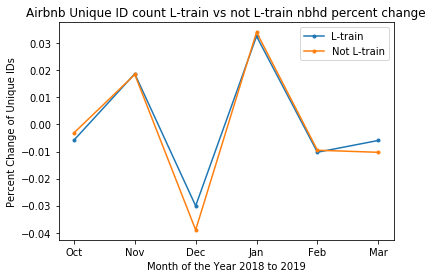

In [31]:
plt.plot(unique_ID_count.pct_change(), '.-', label='L-train')
plt.plot(unique_ID_count_not_L_train_nbhd.pct_change(), '.-', label='Not L-train')
plt.title('Airbnb Unique ID count L-train vs not L-train nbhd percent change')
plt.xlabel('Month of the Year 2018 to 2019')
plt.ylabel('Percent Change of Unique IDs')
plt.legend()
plt.show()